In [2]:
import sys
sys.path.append('../')

import datetime as dt
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd

import knoxdata

# Scrape Data

Please dont execute these and create unnecissary load on knoxville's servers. The data is already available. The next section will download the latest data.

In [10]:
# Get pdfs from dataframes
# dfs = knoxdata.source.knox311.get_knox311_dataframes()
# for key, df in dfs.items():
#    df.to_csv(f'../data/311/{key}.csv')

# Analyze Requests Data

These itemize what the count was each month for each type of call. no clue what `on_time` indicates 

In [14]:
# requests_df = pd.read_csv('../data/311/requests.csv', index_col=0)
requests_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/311/requests.csv', index_col=0)

In [20]:
requests_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2017-11-01 to 2017-10-01
Data columns (total 30 columns):
codes_enforcement_lot_complaint                      11 non-null int64
codes_enforcement_lot_complaint_days                 11 non-null float64
solid_waste_missed_trash_pickup                      11 non-null int64
solid_waste_missed_trash_pickup_days                 11 non-null float64
municipal_court                                      8 non-null float64
municipal_court_days                                 8 non-null float64
kub_referral                                         5 non-null float64
kub_referral_days                                    5 non-null float64
abandoned_vehicle                                    2 non-null float64
abandoned_vehicle_days                               2 non-null float64
trash_recycling_cart_issue                           4 non-null float64
trash_recycling_cart_issue_days                      4 non-null float64
courtesy_box_dumpster

In [15]:
requests_df.sort_index().head(5)

,public,public_on_time,solid_waste,solid_waste_on_time,traffic,traffic_on_time,civil,civil_on_time,storm_water,storm_water_on_time,...,zoning,zoning_on_time,municiple_court,municiple_court_on_time,codes_enforcement,codes_enforcement_on_time,parks_and_recreation,parks_and_recreation_on_time,total_service_requests,total_service_requests_on_time
dates,,,,,,,,,,,,,,,,,,,,,
2017-05-01,768,94.66,666.0,54.05,NaN,NaN,32,100.0,65,96.9,...,9,100.00,NaN,NaN,2347,97.7,25.0,100.0,4330,89.14
2017-06-01,792,96.34,530.0,69.25,305.0,85.25,25,100.0,52,100.0,...,13,100.00,NaN,NaN,2135,98.3,16.0,100.0,3925,92.63
2017-07-01,462,98.50,630.0,88.42,305.0,71.26,25,100.0,43,100.0,...,8,87.50,NaN,NaN,1997,94.7,27.0,74.1,3548,94.38
2017-08-01,609,87.53,567.0,95.77,242.0,66.94,30,100.0,69,97.1,...,15,46.67,NaN,NaN,2156,95.7,35.0,100.0,4185,92.50
2017-09-01,478,93.50,426.0,87.30,119.0,62.20,24,100.0,50,100.0,...,60,86.70,148.0,89.2,1462,94.2,22.0,100.0,3060,91.10


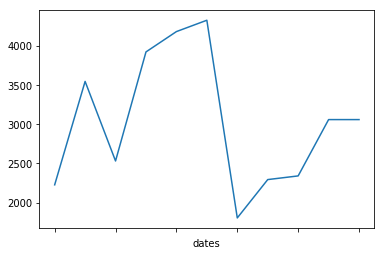

In [16]:
requests_df.total_service_requests.plot()

# Analyze top 5 service requests each month

In [19]:
# services_df = pd.read_csv('../data/311/services.csv', index_col=0)
services_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/311/services.csv', index_col=0)

In [21]:
services_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2017-11-01 to 2017-10-01
Data columns (total 30 columns):
codes_enforcement_lot_complaint                      11 non-null int64
codes_enforcement_lot_complaint_days                 11 non-null float64
solid_waste_missed_trash_pickup                      11 non-null int64
solid_waste_missed_trash_pickup_days                 11 non-null float64
municipal_court                                      8 non-null float64
municipal_court_days                                 8 non-null float64
kub_referral                                         5 non-null float64
kub_referral_days                                    5 non-null float64
abandoned_vehicle                                    2 non-null float64
abandoned_vehicle_days                               2 non-null float64
trash_recycling_cart_issue                           4 non-null float64
trash_recycling_cart_issue_days                      4 non-null float64
courtesy_box_dumpster

In [23]:
services_df.head(5)

,codes_enforcement_lot_complaint,codes_enforcement_lot_complaint_days,solid_waste_missed_trash_pickup,solid_waste_missed_trash_pickup_days,municipal_court,municipal_court_days,kub_referral,kub_referral_days,abandoned_vehicle,abandoned_vehicle_days,...,codes_enforcement_structure_complaint,codes_enforcement_structure_complaint_days,codes_enforcement_abandoned_junk_vehicle,codes_enforcement_abandoned_junk_vehicle_days,traffic_engineering_parking_investigation,traffic_engineering_parking_investigation_days,public_service_brush_pickup_request,public_service_brush_pickup_request_days,public_service_tree_limb_removal,public_service_tree_limb_removal_days
dates,,,,,,,,,,,,,,,,,,,,,
2017-11-01,837,17.5,268,5.2,117.0,1.6,8.0,1.0,75.0,10.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,1816,15.9,539,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,4.3,80.0,12.3,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,794,14.0,251,4.0,135.0,1.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,1948,16.2,423,4.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,173.0,1.4,135.0,3.0,NaN,NaN
2017-08-01,1964,17.1,468,2.7,137.0,1.6,10.0,0.0,NaN,NaN,...,105.0,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


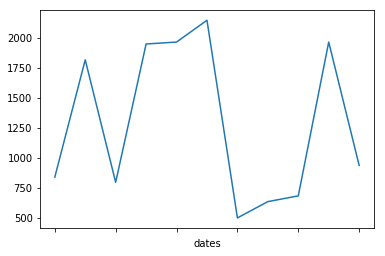

In [24]:
services_df.codes_enforcement_lot_complaint.plot()

# Analyze Statistics Table

In [25]:
# statistics_df = pd.read_csv('../data/311/statistics.csv', index_col=0)
statistics_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/311/statistics.csv', index_col=0)

In [26]:
statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2017-11-01 to 2017-10-01
Data columns (total 4 columns):
end_of_month_open_requests    10 non-null float64
number_of_calls               7 non-null float64
average_answer_time           7 non-null float64
service_quality               7 non-null float64
dtypes: float64(4)
memory usage: 440.0+ bytes


In [27]:
statistics_df.head(5)

,end_of_month_open_requests,number_of_calls,average_answer_time,service_quality
dates,,,,
2017-11-01,86.0,11267.0,23.0,82.0
2017-07-01,208.0,NaN,NaN,NaN
2018-03-01,94.0,13053.0,31.0,80.0
2017-06-01,279.0,NaN,NaN,NaN
2017-08-01,287.0,NaN,NaN,NaN


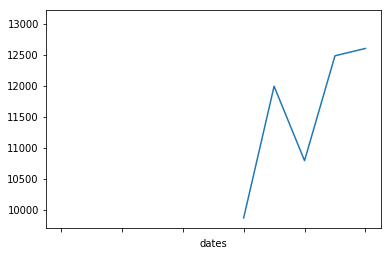

In [28]:
statistics_df.number_of_calls.plot()

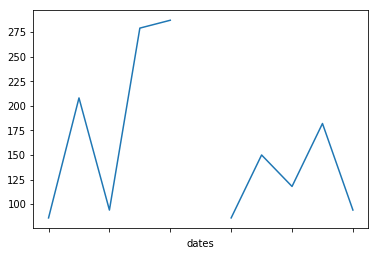

In [29]:
statistics_df.end_of_month_open_requests.plot()